<a href="https://colab.research.google.com/github/GustavoDLRA/Clasificador-para-datos-tabulares-de-Alzheimer/blob/main/Prediccion_Datos_Tabulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción de Alzheimer utilizando datos tabulares**

Proyecto de datos Tabulares

Daniel Cabrera Lozoya

Equipo #3
*   María Fernanda Mendoza A01745728
*   Carolina Obregon A01251983
*   Isabel Navarro A00823132
*   Jaime Montemayor A01176573
*   Gustavo De Los Ríos Alatorre  A01410922









## El Alzheimer

La enfermedad de **Alzheimer** consta de un trastorno neurológico progresivo que provoca el encogimiento del cerebro (atrofia), provocando también el la muerte de las neuronas en el paciente. 

Esta enfermedad es el tipo de demencia más frecuente, conlleva un deterioro continuo en el pensamiento, comportamiento, y habilidades sociales afectando la independencia de aquellos que la padecen.

Actualmente, en EEUU, unos 5.8 millones de personas de 65 años o más viven con la enfermedad. De ellas el 85% tiene 75 años o  más. De los aproximadamente 50 millones de personas con demencia en todo el mundo, se estima que entre 60% y 70% padecen la enfermedad[ de acuerdo con la Mayo Clinic.](https://www.mayoclinic.org/es-es/diseases-conditions/alzheimers-disease/symptoms-causes/syc-20350447)

En *Demencias una visión panorámica*, reporte del quinto simposio de médicina geriátrica realizado en la [Universidad Autónoma de San Luis Potosí](http://www.geriatria.salud.gob.mx/descargas/publicaciones/Demencia.pdf). Se estima que para el año 2050, la cifra de mexicanos afectados por la enfermedad de Alzheimer, será de más de 3.5 millones de personas. 

Debido a que esta es una enfermedad progresiva, los síntomas de esta en etapas tempranas frecuentemente son difíciles de detectar ya que comienza con algo aparentemente común, cómo el momentaneamente olvidarse de ciertas cosas. Es por esta razón que hemos decidido ensamblar un modelo para datos tabulares que sea capaz de asistir en la detección temprana del Alzheimer. 




## Set de datos utilizado
#### OASIS Longitudinal Dataset

El proyecto Open Access Series of Imaging Studies (OASIS) tiene el objetivo de proporcionar sets de datos de resonancia magnética del cerebro a la comunidad científica. 

OASIS existe gracias al Centro de Investigación de la Enfermedad de Alzheimer  de la Universidad de Washington Dr. Randy Buckner en el Instituto Médico Howard Hughes (en la Universidad de Harvard, el grupo de Investigación Neuroimformática de la escuela de medicina de la Universidad de Washington y el centro de investigación de informática biomédica). 



El [OASIS Longitudinal Dataset](https://www.kaggle.com/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv) en particular, consiste en una colección longitudinal de 150 sujetos de entre 60 y 96 años de edad. Cada sujeto fue escaneado en dos o más visitas separadas por al menos un año. Se cuenta con un total de 373 sesiones de imagen. 

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Proyecto_DatosTabulares/Datasets/oasis_longitudinal.csv')

#**Columnas del dataset.**


*   Subject ID: Identificación del paciente. 
*   MRI ID: Identificación del número de resonancia. 
*   Group: Non-Demented, Converted, Demented. (Sin demencia, Convertido, Con demencia)
*   Visit: Identificación del orden de las visitas. 
*   Sexo del paciente (M/F)
*   Hand: Mano dominante (Todos derecha en este caso). 
*   Age: Edad de entre 60 a 98 años de edad. 
*   EDUC: Años de educación. 
*   SES: Estatus socioeconómico. 
*   MMSE: Mini-Mental State Examination. Prueba de salud mental influenciada por la edad y la escolaridad. Entre más baja sea la puntuación, más posible es que el paciente tenga un deterioro cognitivo. Calificación < 24; posible deterioro cognitivo. 
*   Clinical Dementia Rating: Calificación para medir el deterioro mental del paciente. Entre mayor sea, mayor es el deterioro (va de 0 a 3). 
*   eTIV: Volumen intercanial total estimado. 
*   Normalización del volumen del cerebro. 
*   Factor de Escala Atlas.















In [ ]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
display(data.info(), data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


None

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


#Visualización de los datos

In [ ]:
X = data.copy()
X.pop('Subject ID')
X.pop('MRI ID')
X.pop('Hand')


0      R
1      R
2      R
3      R
4      R
      ..
368    R
369    R
370    R
371    R
372    R
Name: Hand, Length: 373, dtype: object

In [ ]:
from plotly.subplots import make_subplots

r, c = 4, 2

fig = make_subplots(rows=r, cols=c)
traces = []

for col in X.columns:
  traces.append(go.Histogram(x=X[col].values,
                             name = X[col].name))
  
for i in range(r):
  for j in range(c):
    try:
      fig.append_trace(traces[i*c+j], i+1, j+1)
    except BaseException as e:
      print(e)
      break

fig.show(renderer='colab')

In [ ]:
# Handling missing values
X_complete = pd.DataFrame(X.shape[0] - X.isnull().sum(), columns=['CompleteSamples'])
X_complete

,CompleteSamples
Group,373
Visit,373
MR Delay,373
M/F,373
Age,373
EDUC,373
SES,354
MMSE,371
CDR,373
eTIV,373


In [ ]:
# SES( Nivel socieconómico) 1-> mejor nivel
#                           5-> bajo nivel
modaSES=X['SES'].mode()
X['SES']=X['SES'].replace(np.NaN,modaSES[0])
X_complete = pd.DataFrame(X.shape[0] - X.isnull().sum(), columns=['CompleteSamples'])
X_complete


,CompleteSamples
Group,373
Visit,373
MR Delay,373
M/F,373
Age,373
EDUC,373
SES,373
MMSE,371
CDR,373
eTIV,373


In [ ]:
#MMSE
X=X.dropna()
X_complete = pd.DataFrame(X.shape[0] - X.isnull().sum(), columns=['CompleteSamples'])
X_complete

,CompleteSamples
Group,371
Visit,371
MR Delay,371
M/F,371
Age,371
EDUC,371
SES,371
MMSE,371
CDR,371
eTIV,371


In [ ]:
display(X.info(), X.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     371 non-null    object 
 1   Visit     371 non-null    int64  
 2   MR Delay  371 non-null    int64  
 3   M/F       371 non-null    object 
 4   Age       371 non-null    int64  
 5   EDUC      371 non-null    int64  
 6   SES       371 non-null    float64
 7   MMSE      371 non-null    float64
 8   CDR       371 non-null    float64
 9   eTIV      371 non-null    int64  
 10  nWBV      371 non-null    float64
 11  ASF       371 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 37.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
Visit,371.0,1.878706,0.923480,1.000,1.0000,2.000,2.000,5.000
MR Delay,371.0,593.876011,636.636500,0.000,0.0000,552.000,869.500,2639.000
Age,371.0,77.018868,7.660864,60.000,71.0000,77.000,82.000,98.000
EDUC,371.0,14.611860,2.877737,6.000,12.0000,15.000,16.000,23.000
SES,371.0,2.439353,1.111835,1.000,2.0000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.0000,29.000,30.000,30.000
CDR,371.0,0.287062,0.371912,0.000,0.0000,0.000,0.500,2.000
eTIV,371.0,1489.876011,174.990473,1106.000,1358.5000,1471.000,1598.000,2004.000
nWBV,371.0,0.729526,0.037229,0.644,0.7000,0.729,0.756,0.837
ASF,371.0,1.193776,0.136533,0.876,1.0985,1.193,1.292,1.587


In [ ]:
#Tratando los datos categoricos:
X['M/F']=X['M/F'].replace('M',0)
X['M/F']=X['M/F'].replace('F',1)
X.columns

Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [ ]:
y = X.pop('Group')

In [ ]:
#Normalizando el dataset:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))#normaliza todos los datos en una escala entre 0 a 1, siendo 0 el valor más pequeño y 1 el más grande
Xnorm=scaler.fit_transform(X)
Xf=pd.DataFrame(Xnorm,columns=[X.columns])
Xf.head(10)

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0.00,0.000000,0.0,0.710526,0.470588,0.25,0.884615,0.00,0.981069,0.269430,0.009845
1,0.25,0.173172,0.0,0.736842,0.470588,0.25,1.000000,0.00,1.000000,0.191710,0.000000
2,0.00,0.000000,0.0,0.394737,0.352941,0.25,0.730769,0.25,0.636971,0.476684,0.239100
3,0.25,0.212202,0.0,0.421053,0.352941,0.25,0.923077,0.25,0.703786,0.357513,0.188467
4,0.50,0.718075,0.0,0.526316,0.352941,0.25,0.692308,0.25,0.659243,0.295337,0.222222
5,0.00,0.000000,1.0,0.736842,0.705882,0.50,0.923077,0.00,0.121381,0.341969,0.798875
6,0.25,0.203865,1.0,0.789474,0.705882,0.50,0.884615,0.00,0.104677,0.383420,0.824191
7,0.00,0.000000,0.0,0.526316,0.352941,0.75,0.923077,0.00,0.649220,0.352332,0.229255
8,0.25,0.382721,0.0,0.605263,0.352941,0.75,0.961538,0.25,0.662584,0.347150,0.219409
9,0.50,0.607427,0.0,0.657895,0.352941,0.75,1.000000,0.00,0.660356,0.316062,0.220816


In [ ]:
y.head(20)

0     Nondemented
1     Nondemented
2        Demented
3        Demented
4        Demented
5     Nondemented
6     Nondemented
7     Nondemented
8     Nondemented
9     Nondemented
10       Demented
11       Demented
12       Demented
13    Nondemented
14    Nondemented
15       Demented
16       Demented
17       Demented
18       Demented
19    Nondemented
Name: Group, dtype: object

In [ ]:
print(len(y))

371


# **Binarización del Dataset.**

Para poder tener representadas las dos clases principales de forma más robusta, se optó por considerar a los "convertidos" ("converted") como personas con un grado de enfermedad avanzada, correspondientes con la clase "Demented", ya que son personas que cumplen con los requisitos para ser considerados con demencia. La diferencia radicaba en que no presentaron estas características sino hasta después de su primera cita. Sin embargo, no estamos considerando el número de citas, sino el resto de las características presentes en el set de datos, bajo las cuales si pueden ser considerados bajo la categoría "Demented."

In [ ]:
# Distribución original
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
  # print(y)

In [ ]:
# Distribución de valores (y original): 
y.value_counts()

Nondemented    190
Demented       144
Converted       37
Name: Group, dtype: int64

## Aquí se realizó el cambio de los valores. 

In [ ]:
y_conv = y.str.replace('Converted', 'Demented')

In [ ]:
# Impresión de los valores ya cambiados
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#  print(y_conv)

In [ ]:
y_conv.value_counts()

Nondemented    190
Demented       181
Name: Group, dtype: int64

In [ ]:
fig = go.Figure(data=go.Pie(labels=['Nondemented', 'Demented'], values=y_conv.value_counts(),
                            textfont = dict(size=15), opacity=0.7,
                            marker = dict(colors=['aquamarine', 'teal'],
                                          line=dict(color='black', width=2.9))))
fig.update_layout(
    title = 'Balance de clases',
    legend = dict(x=0.7, y=1.0)
)
fig.show(renderer='colab')

Se había considerado realizar un proceso de data augmentation utilizando librerías como SMOTE, sin embargo, debido a lo delicado que son estos datos y a que la diferencia en balance es muy pequeña (un 2.4%), se decidió trabajar con los valores originales para mantener el set de datos lo más cercano a la realidad que nos fuese posible. 

# **Limitaciones y cesgos**

Una de las limitaciones principales del dataset utilizado es que solo lista información de pacientes de 60 a 96 años, lo cual es una desventaja por que estamos excluyendo pacientes con edades de 18 a 59. A pesar de que de solo el 5% al 6% de pacientes de Alzheimers muestran sintomas antes de los 65 años, es información que pudiera enriquecer nuestra investigación para que pueda ser utilizada para un amplio rango de edad (Brosch, 2019). 

# **Estado del arte respecto a modelos de inteligencia artificial utilizados para el diagnóstico de Alzheimer**

De acuerdo al paper [Machine learning techniques for the diagnosis of Alzheimer’s disease: A review](https://www.researchgate.net/profile/M-Tanveer/publication/334548759_Machine_Learning_Techniques_for_the_Diagnosis_of_Alzheimer%27s_Disease_A_Review/links/5e9f2dcd299bf13079b1dc52/Machine-Learning-Techniques-for-the-Diagnosis-of-Alzheimers-Disease-A-Review.pdf)
, actualmente, los modelos más utilizados para el diagnóstico de la enfermedad de Alzheimer constan de máquinas de vectores de soporte (SVM), redes neuronales y aprendizaje profundo. 

Se menciona también que hay una tendencia a optar por imágenes ponderadas T1, como las utilizadas en el dataset de OASIS, ya que en estas la delineación de la superficie ventricular del cerebro debido a la atrofia se distingue de forma clara. 

Varios investigadores han utilizado un kernel lineal en sus SVM ya que este no requiere de ajuste. También se utiliza un kernel polinomial para clasificación multivariable con respecto a CN (Normalidad Cognitiva), MCI (Discapacidad Mental Moderada), y AD (Enfermedad de Alzheimer).

De acuerdo al artículo [Machine learning for modeling the progression of Alzheimer disease dementia using clinical data: a systematic literature review](https://academic.oup.com/jamiaopen/article/4/3/ooab052/6334269), las siguientes categorías de modelos son utilizadas: 

*   Regresión Logistica
*   SVM 
*   Árboles de decisión
*   Redes Bayesianas
*   Redes neuronales
*   Procesamiento de lenguaje natural


Para experimentar con estas, optamos por emplear regresión logística y maquinas de vectores de soporte para comparar sus métricas de desempeño con LightGBM. 

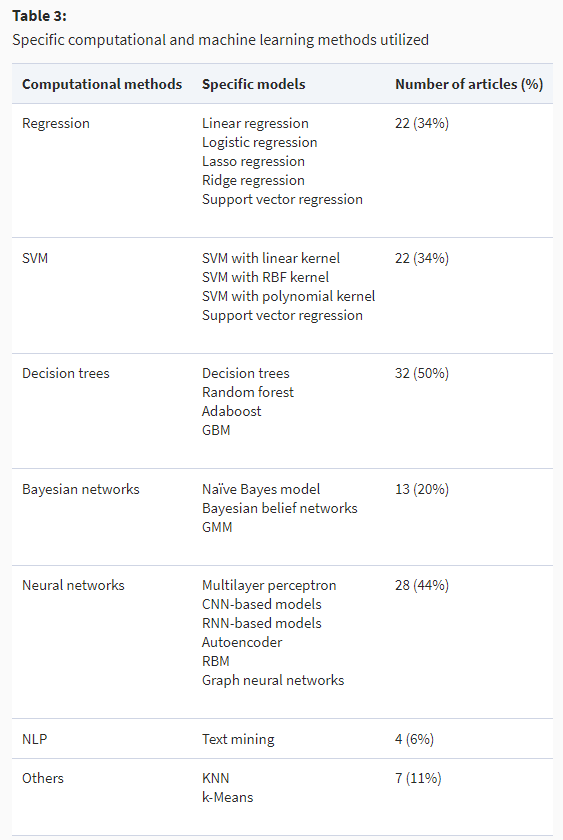

# Máquina de Vectores de Soporte

In [ ]:
import sklearn
from sklearn import datasets
import numpy as np

In [ ]:
y_svm = y_conv.copy()
X_svm = Xf.copy()

In [ ]:
print(X_svm)

    Visit  MR Delay  M/F       Age  ...   CDR      eTIV      nWBV       ASF
0    0.00  0.000000  0.0  0.710526  ...  0.00  0.981069  0.269430  0.009845
1    0.25  0.173172  0.0  0.736842  ...  0.00  1.000000  0.191710  0.000000
2    0.00  0.000000  0.0  0.394737  ...  0.25  0.636971  0.476684  0.239100
3    0.25  0.212202  0.0  0.421053  ...  0.25  0.703786  0.357513  0.188467
4    0.50  0.718075  0.0  0.526316  ...  0.25  0.659243  0.295337  0.222222
..    ...       ...  ...       ...  ...   ...       ...       ...       ...
366  0.25  0.319060  0.0  0.578947  ...  0.25  0.653675  0.259067  0.226442
367  0.50  0.870405  0.0  0.684211  ...  0.25  0.648107  0.160622  0.230661
368  0.00  0.000000  1.0  0.026316  ...  0.00  0.237194  0.813472  0.639944
369  0.25  0.289125  1.0  0.078947  ...  0.00  0.246102  0.787565  0.628692
370  0.50  0.609322  1.0  0.131579  ...  0.00  0.252784  0.813472  0.620253

[371 rows x 11 columns]


In [ ]:
y_svm_new1 = y_svm.replace('Demented', 0)
y_svm_new2 = y_svm_new1.replace('Nondemented', 1)
print(y_svm_new2)

0      1
1      1
2      0
3      0
4      0
      ..
368    0
369    0
370    1
371    1
372    1
Name: Group, Length: 371, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(
                                                    X_svm.values,
                                                    y_svm.values.reshape(-1,1),
                                                    test_size=0.3,
                                                    random_state=109
)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(X_svm_train, y_svm_train.ravel())

y_svm_pred = clf.predict(X_svm_test)

In [ ]:
rounded_predictions = np.argmax(y_svm_pred, axis=-1)

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_svm_test,y_svm_pred))

Accuracy: 0.9642857142857143


In [ ]:
print("Precision:", metrics.precision_score(y_svm_test, y_svm_pred, pos_label='Demented'))

print("Recall", metrics.recall_score(y_svm_test, y_svm_pred,  pos_label='Demented')) #recall_average = recall_score(Y_test, y_predict, average="binary", pos_label="neg")

Precision: 1.0
Recall 0.92


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

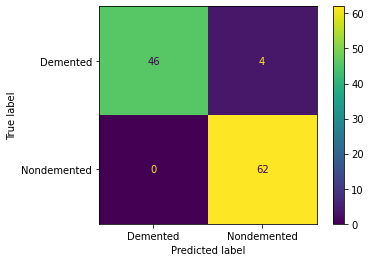

In [ ]:
class_names = np.array(['Demented', 'Nondemented'])

cm = confusion_matrix(y_svm_test, y_svm_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

In [ ]:
print(metrics.classification_report(y_svm_test,clf.predict(X_svm_test)))

              precision    recall  f1-score   support

    Demented       1.00      0.92      0.96        50
 Nondemented       0.94      1.00      0.97        62

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.97      0.96      0.96       112



#Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
#X

In [ ]:
#y_conv.values

In [ ]:
#Dividiendo el dataset en 75% train y 35% test
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values,
                                        y_conv.values.reshape(-1,1),
                                        train_size   = 0.75,
                                        shuffle      = True
                                    )

In [ ]:
#creando el modelo de regresión logística
model = LogisticRegression(penalty='none')
model.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicciones del set de datos de test
predicciones = model.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = model.classes_)
predicciones.head(100)

,Demented,Nondemented
0,0.077320,0.922680
1,0.995848,0.004152
2,0.996659,0.003341
3,0.172336,0.827664
4,0.562004,0.437996
...,...,...
88,0.106201,0.893799
89,0.044085,0.955915
90,0.997489,0.002511
91,0.999988,0.000012


In [ ]:
prediccion_X_test=model.predict(X=X_test)
test=pd.DataFrame(prediccion_X_test,columns=["Prediction"])
test.insert(1,"Real Value",y_test,True)

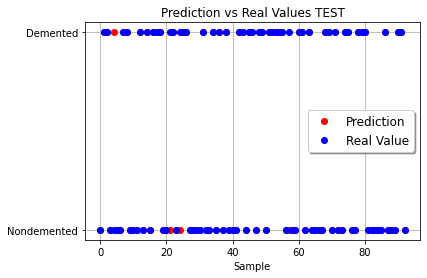

In [ ]:
plt.xlabel("Sample")
plt.title("Prediction vs Real Values TEST")
x=np.arange(93)
plt.plot(x,test['Prediction'],'ro',label="Prediction")
plt.plot(x,test['Real Value'],'bo',label="Real Value")
plt.legend(loc="best",shadow=True,fontsize="larger")
plt.grid()

In [ ]:
#predicciones del set de datos de TRAIN
prediccion_X_train=model.predict(X=X_train)
train=pd.DataFrame(prediccion_X_train,columns=["Prediction"])
train.insert(1,"Real Value",y_train,True)

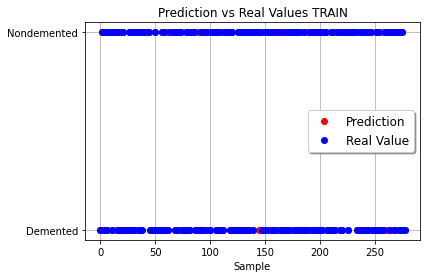

In [ ]:
plt.xlabel("Sample")
plt.title("Prediction vs Real Values TRAIN")
x=np.arange(len(train))
plt.plot(x,train['Prediction'],'ro',label="Prediction")
plt.plot(x,train['Real Value'],'bo',label="Real Value")
plt.legend(loc="best",shadow=True,fontsize="larger")
plt.grid()

In [ ]:
print(metrics.classification_report(y_svm_test,clf.predict(X_svm_test)))

# Light GBM


In [ ]:
!pip install lightgbm

In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing

from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt


In [ ]:
y_gbm = y_conv.copy()
X_gbm = X.copy()

In [ ]:
y_gbm_new1 = y_gbm.replace('Demented', 0)
y_gbm_new2 = y_gbm_new1.replace('Nondemented', 1)
print(y_gbm_new2)

0      1
1      1
2      0
3      0
4      0
      ..
368    0
369    0
370    1
371    1
372    1
Name: Group, Length: 371, dtype: int64


In [ ]:
X_gbm_train, X_gbm_test, y_gbm_train, y_gbm_test = train_test_split(
                                                    X_gbm.values,
                                                    y_gbm_new2.values,#.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=110
)

In [ ]:
train_data = lightgbm.Dataset(X_gbm_train, label=y_gbm_train)
test_data = lightgbm.Dataset(X_gbm_test, label=y_gbm_test)

In [ ]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1}

In [ ]:
model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=test_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

[1]	valid_0's auc: 0.75
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.970128
[3]	valid_0's auc: 0.97155
[4]	valid_0's auc: 0.965505
[5]	valid_0's auc: 0.969772
[6]	valid_0's auc: 0.963371
[7]	valid_0's auc: 0.957681
[8]	valid_0's auc: 0.964794
[9]	valid_0's auc: 0.964794
[10]	valid_0's auc: 0.96266
[11]	valid_0's auc: 0.96266
[12]	valid_0's auc: 0.96266
[13]	valid_0's auc: 0.961949
[14]	valid_0's auc: 0.963371
[15]	valid_0's auc: 0.96266
[16]	valid_0's auc: 0.961949
[17]	valid_0's auc: 0.960526
[18]	valid_0's auc: 0.959815
[19]	valid_0's auc: 0.959815
[20]	valid_0's auc: 0.959104
[21]	valid_0's auc: 0.959104
[22]	valid_0's auc: 0.959104
[23]	valid_0's auc: 0.958393
[24]	valid_0's auc: 0.95697
[25]	valid_0's auc: 0.95697
[26]	valid_0's auc: 0.95697
[27]	valid_0's auc: 0.95697
[28]	valid_0's auc: 0.95697
[29]	valid_0's auc: 0.959104
[30]	valid_0's auc: 0.959815
[31]	valid_0's auc: 0.960526
[32]	valid_0's auc: 0.960526
[33]	valid_0's auc: 0.958393
[34]

In [ ]:
y_train_pred = model_lgbm.predict(X_gbm_train)
y_valid_pred = model_lgbm.predict(X_gbm_test)

print("AUC Train: {:4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_gbm_train, y_train_pred),
                                                   roc_auc_score(y_gbm_test, y_valid_pred)))

AUC Train: 0.967745
AUC Valid: 0.9716


In [ ]:
from sklearn.metrics import average_precision_score
#print(y_valid_pred)
#print('-------------------------')
#print(y_gbm_test)
precScore = average_precision_score( y_gbm_test, y_valid_pred)
print("Precisión del Modelo con LightGBM: {}".format(precScore))

Precisión del Modelo con LightGBM: 0.9647022490581365


# Light GBM (sci-kit learn)

Debido a que sci-kit learn ofrece distintas herramientas para visualizar nuestro modelo con detalle, optamos por implementar también Light GBM mediante esta biblioteca. 

In [ ]:
# train and test split
xgb_train, xgb_test, ygb_train, ygb_test = train_test_split(
    Xf,
    y_gbm_new2,
    test_size=0.33, 
    random_state=42
)

In [ ]:
xgb_train.columns = xgb_train.columns.get_level_values(0)

In [ ]:
xgb_test.columns = xgb_test.columns.get_level_values(0)

In [ ]:
# make predictions using lightgbm for classification
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier

# define the model
model = LGBMClassifier(learning_rate=0.01, max_depth=-5, random_state=42)
# fit the model on the whole dataset
model.fit(xgb_train, ygb_train, eval_set=[(xgb_test,ygb_test), (xgb_train,ygb_train)], eval_metric='logloss')

[1]	training's binary_logloss: 0.683048	training's binary_logloss: 0.683048	valid_0's binary_logloss: 0.68911	valid_0's binary_logloss: 0.68911
[2]	training's binary_logloss: 0.674714	training's binary_logloss: 0.674714	valid_0's binary_logloss: 0.681342	valid_0's binary_logloss: 0.681342
[3]	training's binary_logloss: 0.666545	training's binary_logloss: 0.666545	valid_0's binary_logloss: 0.673733	valid_0's binary_logloss: 0.673733
[4]	training's binary_logloss: 0.658577	training's binary_logloss: 0.658577	valid_0's binary_logloss: 0.666136	valid_0's binary_logloss: 0.666136
[5]	training's binary_logloss: 0.650722	training's binary_logloss: 0.650722	valid_0's binary_logloss: 0.65883	valid_0's binary_logloss: 0.65883
[6]	training's binary_logloss: 0.643019	training's binary_logloss: 0.643019	valid_0's binary_logloss: 0.651668	valid_0's binary_logloss: 0.651668
[7]	training's binary_logloss: 0.635502	training's binary_logloss: 0.635502	valid_0's binary_logloss: 0.644552	valid_0's binary_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(xgb_train,ygb_train)))

Training accuracy 0.9556


In [ ]:
print('Testing accuracy {:.4f}'.format(model.score(xgb_test,ygb_test)))

Testing accuracy 0.9268


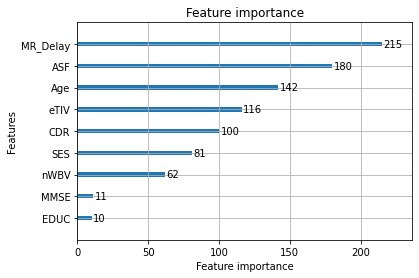

In [ ]:
import lightgbm as lgb
lgb.plot_importance(model)

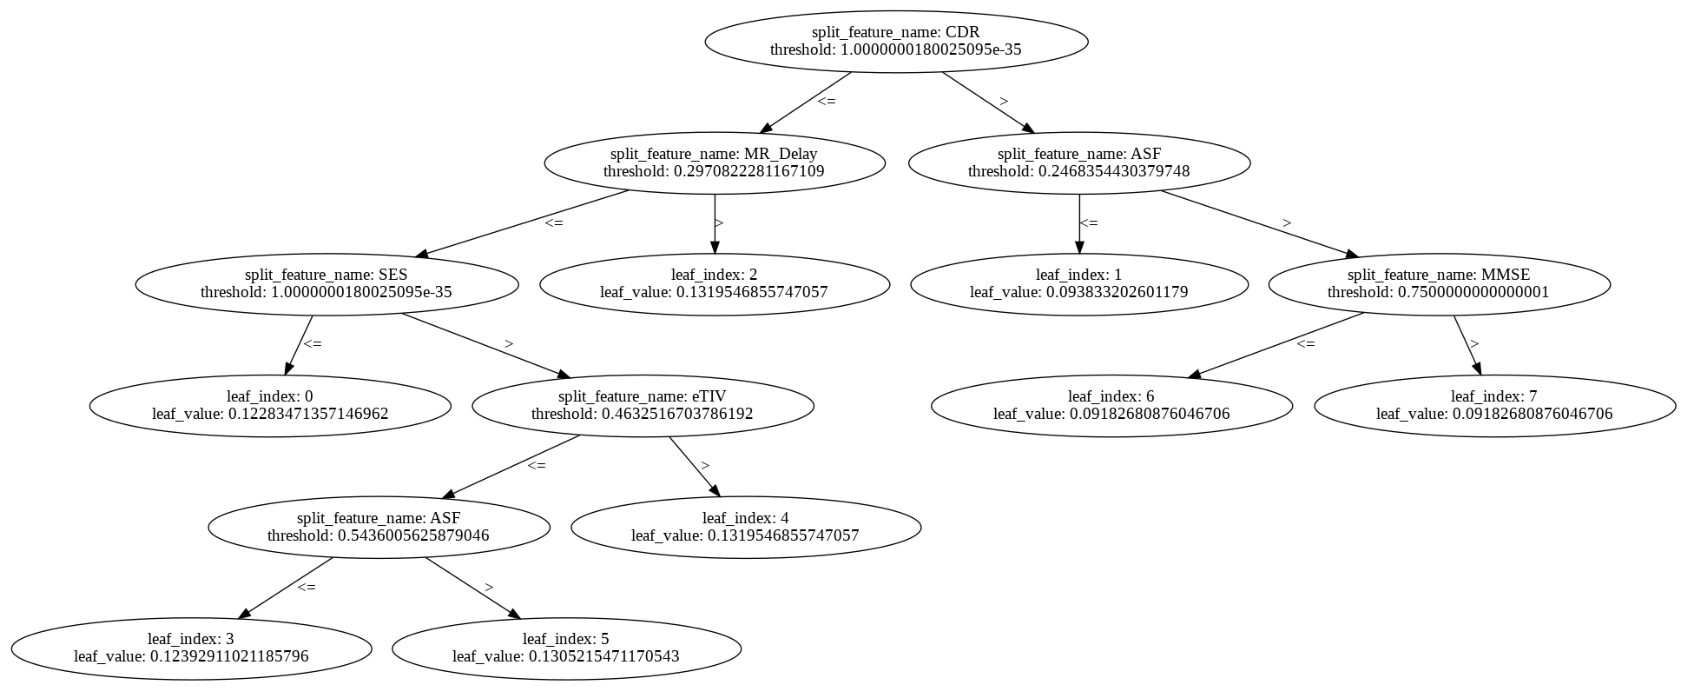

In [ ]:
lgb.plot_tree(model,figsize=(30,40))

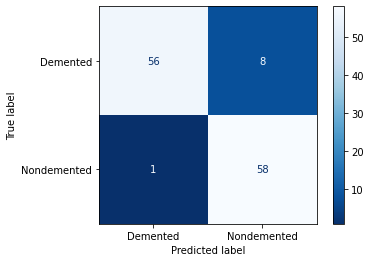

In [ ]:
class_names = np.array(['Demented', 'Nondemented'])
metrics.plot_confusion_matrix(model,xgb_test,ygb_test,cmap='Blues_r', display_labels=class_names)

In [ ]:
print(metrics.classification_report(ygb_test,model.predict(xgb_test)))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        64
           1       0.88      0.98      0.93        59

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.93      0.93      0.93       123



**Referencias**

*   Brosch, JR, et al. Early-onset dementia in adults. https://www.uptodate.com/contents/search. Accessed Dec. 4, 2019.
*   M. Tanveer, B. Richhariya, R.U. Khan, A.H. Rashid, P. Khanna, M. Prasad, and C.T. Lin. 2020. Machine learning techniques for the
diagnosis of Alzheimer’s disease: A review. ACM Trans. Multimedia Comput. Commun. Appl. 16, 1s, Article 30 (April 2020), 28 pages.
https://doi.org/https://doi.org/10.1145/3344998
